In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [2]:
def sigmoid(v):
    return 1 / (1 + np.exp(-v))

def random_sigmoid(v):
    return sigmoid(v) + random.uniform(-0.05, 0.05)

In [3]:
data_set = pd.DataFrame()
data_set['x'] = [i for i in range(-100, 100)]
data_set['y'] = [1 if random_sigmoid(i) >= 0.5 else 0 for i in range(-100, 100)]

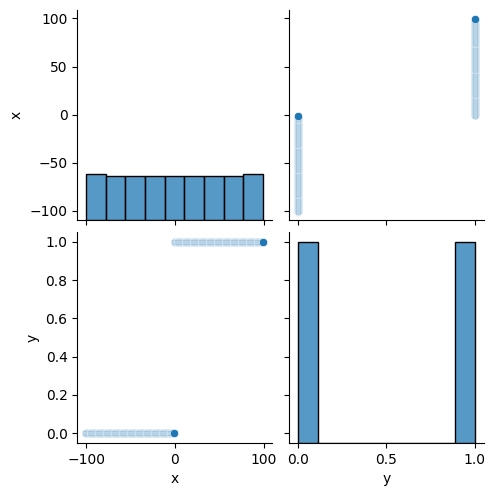

In [4]:
%matplotlib inline
sns.pairplot(data_set)

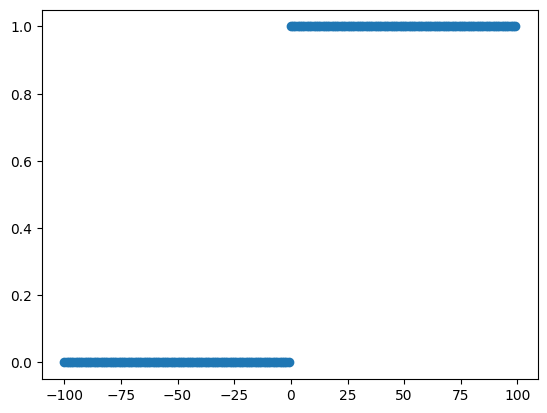

In [33]:
plt.scatter(data_set['x'], data_set['y'])

In [13]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data_set, train_size=0.9, random_state=100)
train_x = train['x']
train_y = train['y']
test_x = test['x']
test_y = test['y']

In [30]:
from tensorflow import keras

inputs = keras.Input(1)
outputs = keras.layers.Dense(1, activation='softmax')(inputs)
model = keras.Model(inputs, outputs)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [31]:
model.fit(train_x, train_y, epochs=100, batch_size=32)

Epoch 1/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0346 - accuracy: 0.4778
Epoch 2/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0337 - accuracy: 0.4778
Epoch 3/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0328 - accuracy: 0.4778
Epoch 4/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0320 - accuracy: 0.4778
Epoch 5/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0312 - accuracy: 0.4778
Epoch 6/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0305 - accuracy: 0.4778
Epoch 7/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0298 - accuracy: 0.4778
Epoch 8/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0291 - accuracy: 0.4778
Epoch 9/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0285 - accuracy: 0.4778
Epoch 10/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0279 - accuracy: 0.4778
Epoch 11/100
6/6 [===========

1/1 [==============================] - 0s 31ms/step


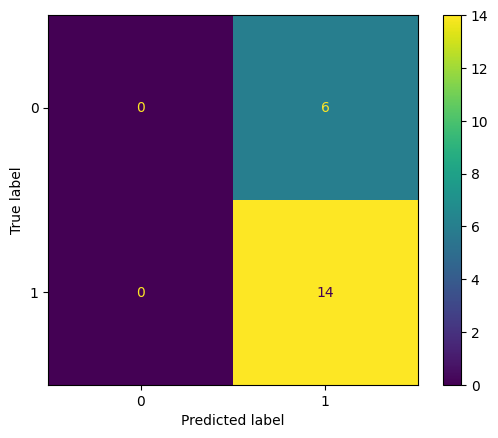

In [32]:
preds = model.predict(test_x)
preds = np.where(preds >= 0.5, 1, 0)

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(test_y, preds)